##**Лабораторная работа №1. Классификация текстов на реальных данных**
Выполнена студентками группы ПИ21-2в Струевой Тамарой и Кучиной Ангелиной

Импорт необходимых библиотек

In [ ]:
from requests import get # библиотека для получения данных с сайта
from bs4 import BeautifulSoup # библиотека для чтения данных из html
import pandas as pd # библиотека для работы с датасетом
import numpy as np # библиотека для работы с числами/пустыми значениями
import csv # библиотека для записи данных в файл
import matplotlib.pyplot as plt # библиотека для визуализации данных

from nltk.stem.snowball import RussianStemmer # стемминг
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import TfidfVectorizer # векторизация текста
from sklearn.metrics import accuracy_score, f1_score # метрики моделей
from sklearn.model_selection import train_test_split # разделение выборки
from sklearn.model_selection import GridSearchCV # подбор лучших параметров
from sklearn.svm import LinearSVC # линейные опорные вектора (модель)
from sklearn.linear_model import LogisticRegression # логистическая регрессия (модель)
from sklearn.linear_model import SGDClassifier # классификация градиентным спуском (модель)
from sklearn.neighbors import KNeighborsClassifier # метод k ближайших соседей (модель)
from nltk.corpus import stopwords # стопслова для удаления из текста
from nltk.tokenize import word_tokenize # токенизация текста (разбиение на слова/токены)
import re #регулярные выражения
import time

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Автоматический сбор информации с отзывами с сайта banki.ru

In [ ]:
base_url = "https://www.banki.ru/insurance/responses/list/"

In [ ]:
def parse_source(url):
    main_url = 'https://www.banki.ru'
    data = {"header": [], "bank": [], "review": [], "rate": [], "date": []}

    i = 1
    # нажимакм на конпку «показать еще»
    page = get(f"{url}?page={i}&isMobile=0")
    while (page.status_code == 200 and i < 400):
        # читаем код страницы
        soup = BeautifulSoup(page.text, "lxml")
        # получаем тэги со ссылками на карточку отзыва
        all_reviews = soup.find_all("article", class_="responses__item")
        # print(all_reviews)

        # достаем ссылки из тэгов и помещаем их в список
        links = []
        for href in all_reviews:
            links.append(href.find("a", href=True)["href"])

        # проход по карточкам с отзывами в списке ссылок
        for link in links:
            # получаем данные из карточки
            result = get(f'{main_url}{link}')
            if (page.status_code == 200 and i < 400):
                content = result.text
                soup = BeautifulSoup(content, 'lxml')
                # получение отдельных данных для заполнения датасета

                try:
                  header = soup.find("h1").text.strip()
                  bank = soup.find("div", itemprop="itemreviewed").text.strip()
                  review = soup.find("div", class_ = "article-text response-page__text markup-inside-small markup-inside-small--bullet").text.strip()
                  rate = soup.find("span", class_ = "rating-grade").text.strip()
                  date = soup.find("time", itemprop="dtreviewed").text.strip()[:-6]
                  # print("i ", i, header, bank, rate, date, sep=", ")

                  data["header"].append(header)
                  data["bank"].append(bank)
                  data["review"].append(review)
                  data["rate"].append(rate)
                  data["date"].append(date)

                except AttributeError:
                  print("&&&")
                  continue
        i += 1
        page = get(f'https://www.banki.ru/insurance/responses/list/?page={i}&isMobile=0')
    return data

In [ ]:
df = pd.DataFrame(parse_source(base_url))

&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&
&&&


In [ ]:
df

,header,bank,review,rate,date
0,Хорошая страховая компания,Т-Страхование,Оформили каско и не пожалели ! Когда случилос...,5,22.09.2024
1,За стразовку,Совкомбанк Страхование,"Самая дешёвая страховка из всех, в Совкомбанк....",4,22.09.2024
2,Как я пришел за ОСАГО в Т-Банк,Т-Страхование,Здравствуйте уважаемые СММщики Т-Банка. Пришел...,1,22.09.2024
3,ОСАГО+КАСКОGO,АльфаСтрахование,"Добрый вечер, один свой автомобиль застраховал...",5,22.09.2024
4,Обман сбербанк страхование семейный актив,Сбербанк страхование жизни,"Дорогие человеки,ни в коем случае не связывайт...",1,22.09.2024
...,...,...,...,...,...
9556,Мне предоставили хорошую скидку на страховку ж...,Т-Страхование,Позвонили с Тинькофф Страхования. У меня оформ...,5,20.01.2024
9557,Мой выбор - Ренессанс,Ренессанс,Здравствуйте! Не всегда принято оставлять поло...,5,20.01.2024
9558,"Защита в пути, КАСКО",Сбербанк страхование,26.12.23 приобрёл автомобиль в кредит в Драйв ...,1,20.01.2024
9559,Нет возврата по страховке,Хоум Кредит Страхование,"Помогите пожалуйста , взял кредит и сразу отка...",1,20.01.2024


### Запись данных в файл

Запишем данные, собранные выше, в файл, чтобы было удобнее и быстрее их доставать.

In [ ]:
filename = "insurance_reviews.csv"
df.to_csv(filename, index=False)

## Загрузка датасета

Читаем датасет из файла, так как код парсинга работает долго…

In [ ]:
df = pd.read_csv("insurance_reviews.csv")
df

,header,bank,review,rate,date
0,Хорошая страховая компания,Т-Страхование,Оформили каско и не пожалели ! Когда случилос...,5,22.09.2024
1,За стразовку,Совкомбанк Страхование,"Самая дешёвая страховка из всех, в Совкомбанк....",4,22.09.2024
2,Как я пришел за ОСАГО в Т-Банк,Т-Страхование,Здравствуйте уважаемые СММщики Т-Банка. Пришел...,1,22.09.2024
3,ОСАГО+КАСКОGO,АльфаСтрахование,"Добрый вечер, один свой автомобиль застраховал...",5,22.09.2024
4,Обман сбербанк страхование семейный актив,Сбербанк страхование жизни,"Дорогие человеки,ни в коем случае не связывайт...",1,22.09.2024
...,...,...,...,...,...
9556,Мне предоставили хорошую скидку на страховку ж...,Т-Страхование,Позвонили с Тинькофф Страхования. У меня оформ...,5,20.01.2024
9557,Мой выбор - Ренессанс,Ренессанс,Здравствуйте! Не всегда принято оставлять поло...,5,20.01.2024
9558,"Защита в пути, КАСКО",Сбербанк страхование,26.12.23 приобрёл автомобиль в кредит в Драйв ...,1,20.01.2024
9559,Нет возврата по страховке,Хоум Кредит Страхование,"Помогите пожалуйста , взял кредит и сразу отка...",1,20.01.2024


## Обработка данных

Изучим датасет и выведем его описательную характкристику. Обработаем/очистим данные для того, чтобы было удобнее их анализировать и визуализировать.

In [ ]:
# выведем размерность датасета
df.shape

(9561, 5)

In [ ]:
# выведем типы данных столбцов
df.dtypes

,0
header,object
bank,object
review,object
rate,int64
date,object


In [ ]:
# выведем основные статистические показатели столбца с оценками
df.describe()

,rate
count,9561.000000
mean,3.579856
std,1.865433
min,1.000000
25%,1.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
# выведем количество уникальных значений датасета по столбцам
df.nunique()

,0
header,7105
bank,65
review,9551
rate,5
date,485


In [ ]:
# проверим количество повторяющихся отзывов
df["review"].duplicated().sum()

10

In [ ]:
# выведем количество пустых значений датасета по столбцам
df.isna().sum()

,0
header,0
bank,0
review,0
rate,0
date,0


В результате изучения датасета и его наполнения выяснилось:

* размерность датасета - `(9561, 5)`;
* оценка указана в числовом формате `int64`, остальные столбцы - `object`;
* средняя оценка по отзывам - `3,58`;
* из 9561 отзывов уникальными являются 9551, 10 отзывов - дубликаты;
* нулевые значения отсутствуют;
* количество банков/организаций в датасете - `65`.

Следовательно, дубликаты необходимо удалить. Далее будет обработка и очистка данных.

In [ ]:
# удаляем дубликаты отзывов
df.drop_duplicates(subset="review", inplace=True)
df

,header,bank,review,rate,date
0,Хорошая страховая компания,Т-Страхование,Оформили каско и не пожалели ! Когда случилос...,5,22.09.2024
1,За стразовку,Совкомбанк Страхование,"Самая дешёвая страховка из всех, в Совкомбанк....",4,22.09.2024
2,Как я пришел за ОСАГО в Т-Банк,Т-Страхование,Здравствуйте уважаемые СММщики Т-Банка. Пришел...,1,22.09.2024
3,ОСАГО+КАСКОGO,АльфаСтрахование,"Добрый вечер, один свой автомобиль застраховал...",5,22.09.2024
4,Обман сбербанк страхование семейный актив,Сбербанк страхование жизни,"Дорогие человеки,ни в коем случае не связывайт...",1,22.09.2024
...,...,...,...,...,...
9556,Мне предоставили хорошую скидку на страховку ж...,Т-Страхование,Позвонили с Тинькофф Страхования. У меня оформ...,5,20.01.2024
9557,Мой выбор - Ренессанс,Ренессанс,Здравствуйте! Не всегда принято оставлять поло...,5,20.01.2024
9558,"Защита в пути, КАСКО",Сбербанк страхование,26.12.23 приобрёл автомобиль в кредит в Драйв ...,1,20.01.2024
9559,Нет возврата по страховке,Хоум Кредит Страхование,"Помогите пожалуйста , взял кредит и сразу отка...",1,20.01.2024


In [ ]:
# изменение формата столбца даты с обходом и заменой строк, в которых дата указана некорректно
# (некорректные данные будут заменены на значение NaT)
df["date"] = pd.to_datetime(df["date"], format="%d.%m.%Y", errors='coerce')
df

,header,bank,review,rate,date
0,Хорошая страховая компания,Т-Страхование,Оформили каско и не пожалели ! Когда случилос...,5,2024-09-22
1,За стразовку,Совкомбанк Страхование,"Самая дешёвая страховка из всех, в Совкомбанк....",4,2024-09-22
2,Как я пришел за ОСАГО в Т-Банк,Т-Страхование,Здравствуйте уважаемые СММщики Т-Банка. Пришел...,1,2024-09-22
3,ОСАГО+КАСКОGO,АльфаСтрахование,"Добрый вечер, один свой автомобиль застраховал...",5,2024-09-22
4,Обман сбербанк страхование семейный актив,Сбербанк страхование жизни,"Дорогие человеки,ни в коем случае не связывайт...",1,2024-09-22
...,...,...,...,...,...
9556,Мне предоставили хорошую скидку на страховку ж...,Т-Страхование,Позвонили с Тинькофф Страхования. У меня оформ...,5,2024-01-20
9557,Мой выбор - Ренессанс,Ренессанс,Здравствуйте! Не всегда принято оставлять поло...,5,2024-01-20
9558,"Защита в пути, КАСКО",Сбербанк страхование,26.12.23 приобрёл автомобиль в кредит в Драйв ...,1,2024-01-20
9559,Нет возврата по страховке,Хоум Кредит Страхование,"Помогите пожалуйста , взял кредит и сразу отка...",1,2024-01-20


При изменении формата данных обнаружилось, что не во всех строках указана корректная дата.
Посмотрим, сколько строк содержат ошибочные данные и удалим.

In [ ]:
# количество строк с некорректной датой
df["date"].isna().sum()

1395

In [ ]:
df.dropna(axis=0, subset="date", inplace=True)
df

,header,bank,review,rate,date
0,Хорошая страховая компания,Т-Страхование,Оформили каско и не пожалели ! Когда случилос...,5,2024-09-22
1,За стразовку,Совкомбанк Страхование,"Самая дешёвая страховка из всех, в Совкомбанк....",4,2024-09-22
2,Как я пришел за ОСАГО в Т-Банк,Т-Страхование,Здравствуйте уважаемые СММщики Т-Банка. Пришел...,1,2024-09-22
3,ОСАГО+КАСКОGO,АльфаСтрахование,"Добрый вечер, один свой автомобиль застраховал...",5,2024-09-22
4,Обман сбербанк страхование семейный актив,Сбербанк страхование жизни,"Дорогие человеки,ни в коем случае не связывайт...",1,2024-09-22
...,...,...,...,...,...
9556,Мне предоставили хорошую скидку на страховку ж...,Т-Страхование,Позвонили с Тинькофф Страхования. У меня оформ...,5,2024-01-20
9557,Мой выбор - Ренессанс,Ренессанс,Здравствуйте! Не всегда принято оставлять поло...,5,2024-01-20
9558,"Защита в пути, КАСКО",Сбербанк страхование,26.12.23 приобрёл автомобиль в кредит в Драйв ...,1,2024-01-20
9559,Нет возврата по страховке,Хоум Кредит Страхование,"Помогите пожалуйста , взял кредит и сразу отка...",1,2024-01-20


Проверим количество отзывов для каждой организации и удалим те, у которых количество отзывов меньше 100.

In [ ]:
df_bank = df.groupby("bank").review.count().sort_values()
df_bank

,review
bank,
Ак Барс Страхование,1
Росбанк Страхование,1
РБ Страхование Жизни,1
Ю-Лайф,1
НКО ПОВС «Страховой дом «Платинум»,1
...,...
Ренессанс Жизнь,383
АльфаСтрахование-Жизнь,399
Сбербанк страхование,939


In [ ]:
# получение спсика оорганизаций, у которых меньше 100 отзывов
organizations_less_100_reviews = df_bank.loc[df_bank.index.isin(df_bank.where(df_bank < 100).dropna().index)].index
organizations_less_100_reviews

Index(['Ак Барс Страхование', 'Росбанк Страхование', 'РБ Страхование Жизни',
       'Ю-Лайф', 'НКО ПОВС «Страховой дом «Платинум»',
       'Страховая фирма «Адонис»', 'Зетта Страхование жизни',
       'Зетта Страхование (бывшая СК «Альянс»)', 'Дефанс Страхование',
       'ПСБ Страхование', 'Пари',
       'Медицинская акционерная страховая компания (МАКС-М)',
       'Капитал МС (РГС-Медицина)', 'Двадцать первый век',
       'Русский Стандарт Страхование', 'АльфаСтрахование-ОМС',
       'ДЕЛО ЖИЗНИ (НСГ Страхование жизни)', 'Инсайт',
       'Русское страховое общество «Евроинс»', 'Бестиншур',
       'Инлайф страхование жизни', 'РЕСО-Мед', 'ППФ Страхование жизни',
       'Страховая бизнес группа', 'Газпром Страхование', 'Ингосстрах-Жизнь',
       'Объединенная страховая компания', 'Спасские ворота',
       'РСХБ-Страхование жизни', 'Энергогарант', 'БКС Страхование жизни',
       'РСХБ-Страхование', 'СОГАЗ-Мед', 'ВСК-Линия жизни',
       'Хоум Кредит Страхование', 'СК ГАЙДЕ', 'Капитал-Поли

In [ ]:
# удаление отзывов огранизаций, у которых количество отзывов меньше 100, из датасета
# df.bank.isin(organizations_less_100_reviews)
# data[data.marks.isin(list1) == False]
df = df[df.bank.isin(list(organizations_less_100_reviews)) == False]
df

,header,bank,review,rate,date
0,Хорошая страховая компания,Т-Страхование,Оформили каско и не пожалели ! Когда случилос...,5,2024-09-22
1,За стразовку,Совкомбанк Страхование,"Самая дешёвая страховка из всех, в Совкомбанк....",4,2024-09-22
2,Как я пришел за ОСАГО в Т-Банк,Т-Страхование,Здравствуйте уважаемые СММщики Т-Банка. Пришел...,1,2024-09-22
3,ОСАГО+КАСКОGO,АльфаСтрахование,"Добрый вечер, один свой автомобиль застраховал...",5,2024-09-22
4,Обман сбербанк страхование семейный актив,Сбербанк страхование жизни,"Дорогие человеки,ни в коем случае не связывайт...",1,2024-09-22
...,...,...,...,...,...
9554,Тинькофф страхование,Т-Страхование,"Все прошло быстро, деньги поступили на карту у...",5,2024-01-21
9556,Мне предоставили хорошую скидку на страховку ж...,Т-Страхование,Позвонили с Тинькофф Страхования. У меня оформ...,5,2024-01-20
9557,Мой выбор - Ренессанс,Ренессанс,Здравствуйте! Не всегда принято оставлять поло...,5,2024-01-20
9558,"Защита в пути, КАСКО",Сбербанк страхование,26.12.23 приобрёл автомобиль в кредит в Драйв ...,1,2024-01-20


In [ ]:
# выведем среднее количество отзывов для организаций
mean_number_of_reviews = round(df.groupby("bank").review.count().mean(), 2)
mean_number_of_reviews

530.71

Выведем
* размерность датасета, очищенного от дубликатов, пустых значений, некорректной даты и организаций с малым количеством отзывов;
* количество уникальных значений для очищенного датасета;
* описательную характеристику нового датасета.


In [ ]:
df.shape

(7430, 5)

In [ ]:
df.nunique()

,0
header,5528
bank,14
review,7430
rate,5
date,247


In [ ]:
df.describe()

,rate,date
count,7430.000000,7430
mean,3.734455,2024-06-11 00:18:36.339165696
min,1.000000,2024-01-20 00:00:00
25%,1.000000,2024-04-10 00:00:00
50%,5.000000,2024-06-22 00:00:00
75%,5.000000,2024-08-18 00:00:00
max,5.000000,2024-09-22 00:00:00
std,1.815010,NaN


In [ ]:
mean_value = round(df.describe()["rate"]["mean"], 2)
mean_value

3.73

В результате обработки данных:
* размерность датасета стала `(7430, 5)` - удалили `2131` строки;
* средняя оценка по выборке стала `3.73` - выросла на `0,15`;
* были удалены дубликаты отзывов;
* были удалены строки, в котрых дата была указана неправильно;
* были удалены организации, у которых количество отзывов было меньше 100.

## Анализ предметной область (графики)

### График 1
Для первого графика мы возьмем топ 5 банков/организаций, основываясь на их средней оценке и выведем количество отзывов.

In [ ]:
# сгруппируем данные по столбцу bank
df_group_by_bank = df.groupby("bank").rate.mean()
df_group_by_bank
# # отсортируем полученные данные по убыванию и возьмем первые 5
df_group_by_bank_sort = df_group_by_bank.sort_values(ascending=False)
df_group_by_bank_sort.head()

,rate
bank,
Совкомбанк Страхование Жизни,4.866379
КАПИТАЛ LIFE,4.637755
Совкомбанк Страхование,4.625381
Т-Страхование,4.429542
Сбербанк страхование,4.064963


In [ ]:
top_5_org_by_rate = list(df_group_by_bank_sort.index)[:5]

# подсчитываем, сколько отзывов у каждой организации
number_of_rates = df.groupby("bank").review.count()

#
filtered_rates = number_of_rates.loc[number_of_rates.index.isin(top_5_org_by_rate)]
filtered_rates

,review
bank,
КАПИТАЛ LIFE,196
Сбербанк страхование,939
Совкомбанк Страхование,985
Совкомбанк Страхование Жизни,232
Т-Страхование,2207


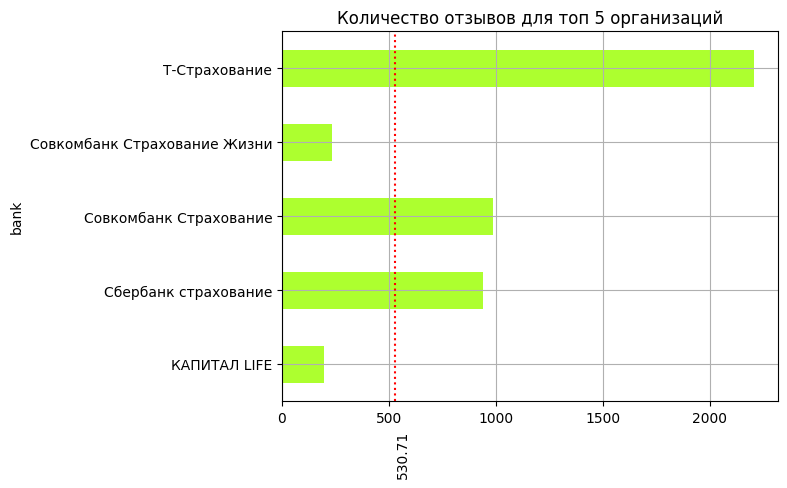

In [ ]:
filtered_rates.plot(kind = "barh", color = "greenyellow")
plt.title("Количество отзывов для топ 5 организаций")
plt.axvline(x = mean_number_of_reviews, color = "red", linestyle = "dotted")
plt.text(x=mean_number_of_reviews, y=-1.5, s=str(mean_number_of_reviews), rotation="vertical")
plt.grid()
plt.show()

**Вывод:**

На диаграмме(которая показывает количество отзывов об организациях с наиболее высокой средней оценкой) видно, что
* люди чаще всего пишут отзывы про организацию `Т-Страхование` (отзывов больше 2000);
* у банков/организаций - `Т-Страхование`, `Совкомбанк Страхование`, `Сбербанк страхование` - отзывов больше, чем среднее число отзывов по организациям выборки;
* самый популярный банк/организация - `Т-Страхование`;
* количество отзывов о `Совкомбн Страхование Жизни` и `КАПИТАЛ LIFE` сильно ниже среднего значения.

### График 2
Для второго графика мы возьмем топ 5 банков/организаций, основываясь количестве оценнок и выведем среднюю оценку по их отзывам.

Данный график отражает более объективную картину, в отличие от предыдущего, так как 5 банков выбираются на основе отзывов (чем больше отзывов, тем объективнее будет средняя оценка).

In [ ]:
# средние оценки отзывов для топ 5 банков/организаций
# топ 5 по количеству оценок

# сгруппируем данные по столбцу bank
df_group_by_bank_2 = df.groupby("bank").rate.count()

# отсортируем полученные данные по убыванию и возьмем первые 5
df_group_by_bank_sort_2 = df_group_by_bank_2.sort_values(ascending=False)
print("Количество отзывов в топ 5 организаций")
df_group_by_bank_sort_2.head()

Количество отзывов в топ 5 организаций


,rate
bank,
Т-Страхование,2207
Совкомбанк Страхование,985
Сбербанк страхование,939
АльфаСтрахование-Жизнь,399
Ренессанс Жизнь,383


In [ ]:
top_5_org_by_rate_2 = list(df_group_by_bank_sort_2.index)[:5]
top_5_org_by_rate_2

['Т-Страхование',
 'Совкомбанк Страхование',
 'Сбербанк страхование',
 'АльфаСтрахование-Жизнь',
 'Ренессанс Жизнь']

In [ ]:
mean_value_of_rates = df.groupby(["bank"]).rate.mean()

filtered_rates_2 = mean_value_of_rates.loc[mean_value_of_rates.index.isin(top_5_org_by_rate_2)]
filtered_rates_2

,rate
bank,
АльфаСтрахование-Жизнь,2.538847
Ренессанс Жизнь,3.765013
Сбербанк страхование,4.064963
Совкомбанк Страхование,4.625381
Т-Страхование,4.429542


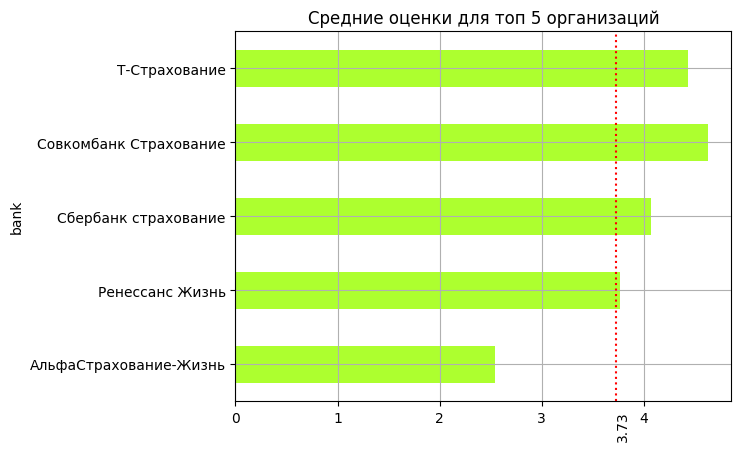

In [ ]:
filtered_rates_2.plot(kind = "barh", color = "greenyellow")
plt.title("Средние оценки для топ 5 организаций")
plt.grid()
plt.axvline(x = mean_value, color = "red", linestyle = "dotted")
plt.text(x=mean_value, y=-1, s=str(mean_value), rotation="vertical")
plt.show()

**Вывод:**

На графике видно:
* 4 организации - `Т-Страхование`, `Совкомбанк Страхование`, `Сбербанк страхование`, `Ренесанс Жизнь` - имеют оценку выше средней по общей выборке;
* 3 организации - `Т-Страхование`, `Совкомбанк Страхование`, `Сбербанк страхование` - имеют среднюю оценку выше 4, то есть «Хорошо»;
* самая низкая оценка (намного ниже средней - ≈2,5) у `АльфаСтрахование-Жизнь`.

Для более детального анализа зависимости средней оценки и количества отзывов нарисуем еще 1 график.

### График 3
Для третьего графика мы возьмем топ 5 банков/организаций, основываясь количестве оценнок и выведем среднюю оценку по их отзывам.

In [ ]:
# выводим среднюю оценку всех банков/организаций
all_mean_rates = df.groupby(["bank"]).rate.mean()
all_mean_rates

,rate
bank,
АльфаСтрахование,1.386503
АльфаСтрахование-Жизнь,2.538847
ВСК,2.850000
Ингосстрах,3.014286
КАПИТАЛ LIFE,4.637755
Ренессанс,2.432886
Ренессанс Жизнь,3.765013
Росгосстрах,1.860825
СОГАЗ,3.155556


In [ ]:
# выводим количество отзывов всех банков/организаций
all_reviews = df.groupby(["bank"]).review.count()
all_reviews

,review
bank,
АльфаСтрахование,326
АльфаСтрахование-Жизнь,399
ВСК,380
Ингосстрах,280
КАПИТАЛ LIFE,196
Ренессанс,298
Ренессанс Жизнь,383
Росгосстрах,194
СОГАЗ,360


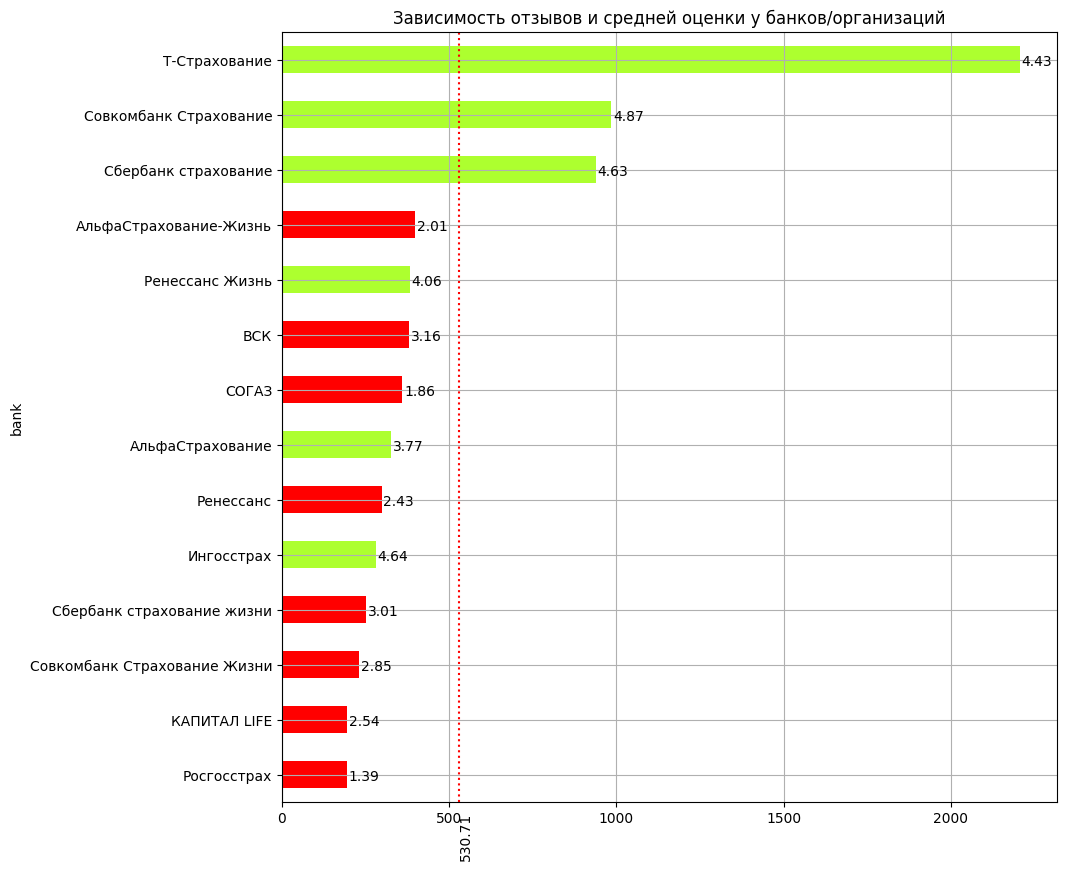

In [ ]:
colors = ["red" if rate < mean_value else "greenyellow" for rate in all_mean_rates]

plt.figure(figsize=(10, 10))
all_reviews.sort_values(ascending=True).plot(kind = "barh", color = colors)
plt.title("Зависимость отзывов и средней оценки у банков/организаций")

for i, (value, mean_value) in enumerate(zip(all_reviews.sort_values(ascending=True), all_mean_rates)):
    plt.text(value + 5, i, f"{mean_value:.2f}", va='center_baseline')

plt.axvline(x = 530, color = "red", linestyle = "dotted")
plt.text(x=mean_number_of_reviews, y=-1.5, s=str(mean_number_of_reviews), rotation="vertical")
plt.grid()
plt.show()

**Вывод**

На диаграмме отображена зависимость между количеством отзывов и средней оценки у организаци.

* красная пунктирная линия - среднее количество отзывов по всем организациям;
* у трех организаций количество отзывов выше среднего показателя: `Т-Страхование`, `Совкомбанк Страхование` и `Сбербанк Страхование`;
* красным цветом выделены организации, у которых средняя оценка ниже среднего показателя, зеленым - выше.

Следовательно, чаще всего люди пользуются, оставляют отзывы и ставят положительную оценку организациям:Т-Страхование,Совкомбанк Страхование и Сбербанк Страхование

In [ ]:
# Сравнение отзывов по положительным и отрицательным оценкам

In [ ]:
# топ 5 дат - дни недели - средние оценки/количество оценок

In [ ]:
# средняя оценка по датам/месяцам

## Сравнение классов

In [ ]:
df

,header,bank,review,rate,date
0,Хорошая страховая компания,Т-Страхование,Оформили каско и не пожалели ! Когда случилос...,5,2024-09-22
1,За стразовку,Совкомбанк Страхование,"Самая дешёвая страховка из всех, в Совкомбанк....",4,2024-09-22
2,Как я пришел за ОСАГО в Т-Банк,Т-Страхование,Здравствуйте уважаемые СММщики Т-Банка. Пришел...,1,2024-09-22
3,ОСАГО+КАСКОGO,АльфаСтрахование,"Добрый вечер, один свой автомобиль застраховал...",5,2024-09-22
4,Обман сбербанк страхование семейный актив,Сбербанк страхование жизни,"Дорогие человеки,ни в коем случае не связывайт...",1,2024-09-22
...,...,...,...,...,...
9554,Тинькофф страхование,Т-Страхование,"Все прошло быстро, деньги поступили на карту у...",5,2024-01-21
9556,Мне предоставили хорошую скидку на страховку ж...,Т-Страхование,Позвонили с Тинькофф Страхования. У меня оформ...,5,2024-01-20
9557,Мой выбор - Ренессанс,Ренессанс,Здравствуйте! Не всегда принято оставлять поло...,5,2024-01-20
9558,"Защита в пути, КАСКО",Сбербанк страхование,26.12.23 приобрёл автомобиль в кредит в Драйв ...,1,2024-01-20


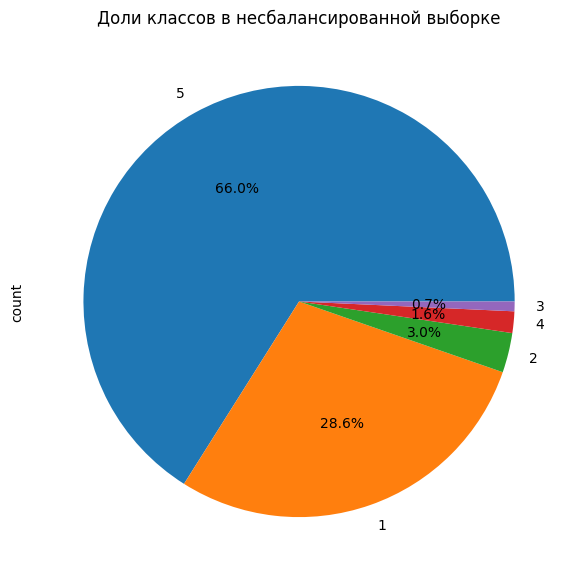

In [ ]:
df["rate"].value_counts().plot.pie(figsize=(7, 7), autopct='%1.1f%%')
plt.title("Доли классов в несбалансированной выборке")
plt.show()

На диаграмме выше видно, что имеется большой разброс в рейтинге:
* максимальное значение - `66.0%` (оценка 5)
* минимальное значение - `0.7%` (оценка 3)

Поэтому необходимо провести балансировку классов с помощью метода `RandomOverSampler`.
метод `RandomUnderSampler` не подойдет для балансировки, так как наименьшая группа составляет - 54 отзыва, из-за чего выборка станет маленькой.

In [ ]:
df.groupby("bank").review.count()

,review
bank,
АльфаСтрахование,326
АльфаСтрахование-Жизнь,399
ВСК,380
Ингосстрах,280
КАПИТАЛ LIFE,196
Ренессанс,298
Ренессанс Жизнь,383
Росгосстрах,194
СОГАЗ,360


In [ ]:
# Создание экземпляра RandomOverSampler
ros = RandomOverSampler()

X_ros = df.drop(columns=["rate"]) # Признаки
y_ros = df["rate"] # Целевое значение


# Применение увеличения выборки к данным
X_resampled_ros, y_resampled_ros = ros.fit_resample(X_ros, y_ros)

df_resampled_ros = pd.DataFrame(X_resampled_ros, columns=X_ros.columns)
df_resampled_ros["rate"] = y_resampled_ros

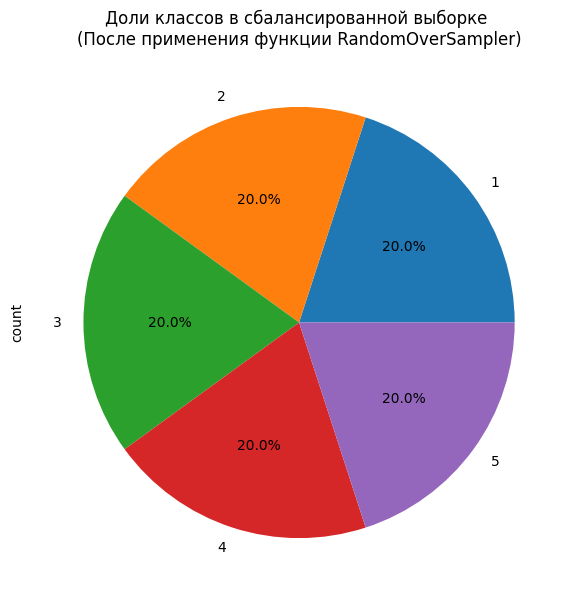

In [ ]:
df_resampled_ros["rate"].value_counts().sort_index().plot.pie(figsize=(7, 7), autopct='%1.1f%%')
plt.title("Доли классов в сбалансированной выборке \n(После применения функции RandomOverSampler)")
plt.show()

**Вывод**

После применения метода RandomOverSampler можно заметить, что всех значений стало одинаковое количество.


# Модели МО

###Предобработка данных

Сначала напишем функцию, которая приведет все данные в нижний регистр, удалит стоп-слова, а так же проведет стемминг.

In [ ]:
def prepare_data(text, window_size=2):
  '''Функция обработки текстовых полей для более удобной работы далее'''
  # преобразуем текст в нижний регистр
  text = text.lower()

  # удаляем все символы кроме a-z, @, и #
  text = re.sub(r'[^а-я@# ]', ' ', text)

  # удаляем стопслова
  tokens = word_tokenize(text) # делим строку на токены
  filtered_tokens = [word for word in tokens if not word in stopwords.words('russian')]

  # стемминг
  st = RussianStemmer()
  stemmed_tockens = [st.stem(word) for word in filtered_tokens]
  result = " ".join(stemmed_tockens)
  return result

In [ ]:
df['review'] = df['review'].apply(prepare_data)

<ipython-input-40-1ebb178e8e5b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].apply(prepare_data)


In [ ]:
df

,header,bank,review,rate,date
0,Хорошая страховая компания,Т-Страхование,оформ каск пожалел случ дтп менеджер анастас с...,5,2024-09-22
1,За стразовку,Совкомбанк Страхование,деш ва страховк совкомбанк позвон помогл продл...,4,2024-09-22
2,Как я пришел за ОСАГО в Т-Банк,Т-Страхование,здравств уваж сммщик т банк пришел знач сво лк...,1,2024-09-22
3,ОСАГО+КАСКОGO,АльфаСтрахование,добр вечер сво автомоб застрахов альфастрахова...,5,2024-09-22
4,Обман сбербанк страхование семейный актив,Сбербанк страхование жизни,дорог человек ко случ связыв сбербанк люб стра...,1,2024-09-22
...,...,...,...,...,...
7425,Тинькофф страхование,Т-Страхование,прошл быстр деньг поступ карт втор ден подач д...,5,2024-01-21
7426,Мне предоставили хорошую скидку на страховку ж...,Т-Страхование,позвон тинькофф страхова оформл ипотек днях до...,5,2024-01-20
7427,Мой выбор - Ренессанс,Ренессанс,здравств прин оставл положительн отз страх ком...,5,2024-01-20
7428,"Защита в пути, КАСКО",Сбербанк страхование,приобр л автомоб кред драйв клик банк усл офор...,1,2024-01-20


In [ ]:
df.reset_index(drop=True, inplace=True)

### Получение выборок для обучения и тестирования моделей


Сначала возьмем данные, которые будут использованы для обучения и тестов моделей, а потом возьмем целевое значение. Так же будет необходимо преобразовать текстовые данные в числа, чтобы модели машинного обучения могли работать с данными, для чего воспользуемся векторизацией.

In [ ]:
# получение значений столбца с текстом отзывов
text_reviews = df["review"]
text_reviews

,review
0,оформ каск пожалел случ дтп менеджер анастас с...
1,деш ва страховк совкомбанк позвон помогл продл...
2,здравств уваж сммщик т банк пришел знач сво лк...
3,добр вечер сво автомоб застрахов альфастрахова...
4,дорог человек ко случ связыв сбербанк люб стра...
...,...
7425,прошл быстр деньг поступ карт втор ден подач д...
7426,позвон тинькофф страхова оформл ипотек днях до...
7427,здравств прин оставл положительн отз страх ком...
7428,приобр л автомоб кред драйв клик банк усл офор...


In [ ]:
# векторизация данных
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text_reviews)
X

<7430x14461 sparse matrix of type '<class 'numpy.float64'>'
	with 415581 stored elements in Compressed Sparse Row format>

In [ ]:
y = df["rate"]

In [ ]:
# проверка размерности
X.shape, y.shape

((7430, 14461), (7430,))

### Создание и обучение моделей

In [ ]:
# разделение выборки
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
x_train, x_test, y_train, y_test

(<5944x14461 sparse matrix of type '<class 'numpy.float64'>'
 	with 331740 stored elements in Compressed Sparse Row format>,
 <1486x14461 sparse matrix of type '<class 'numpy.float64'>'
 	with 83841 stored elements in Compressed Sparse Row format>,
 179     1
 1318    5
 898     5
 4931    1
 6625    5
        ..
 5532    5
 5981    5
 6087    1
 2137    5
 6477    5
 Name: rate, Length: 5944, dtype: int64,
 6605    5
 7014    1
 6102    5
 3941    1
 6864    5
        ..
 5422    5
 4442    1
 4983    5
 5842    5
 5032    5
 Name: rate, Length: 1486, dtype: int64)

In [ ]:
# вывод размерности всех выборок
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5944, 14461), (1486, 14461), (5944,), (1486,))

Мы видим, что размерность `x_train (5944, 15992)` и `y_train (5944, )` совпадает, так же как и размерность `x_test (1486, 15992)` и `y_test (1486, )`.



###  Модель линейных опорных векторов

In [ ]:
# начальное время
start_time = time.time()

# задание параметров для перебора
parameters_scv = {"C": [0.1, 1.0, 10.0], "loss": ["hinge", "squared_hinge"], "penalty": ["l1", "l2"]}
grid_search_SVC = GridSearchCV(LinearSVC(), parameters_scv, cv=3, scoring="accuracy", verbose=10)
grid_search_SVC.fit(x_train, y_train)

# конечное время
end_time = time.time()

# разница между конечным и начальным временем
grid_time_linear_svc = end_time - start_time

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3; 1/12] START C=0.1, loss=hinge, penalty=l1..............................
[CV 1/3; 1/12] END .C=0.1, loss=hinge, penalty=l1;, score=nan total time=   0.0s
[CV 2/3; 1/12] START C=0.1, loss=hinge, penalty=l1..............................
[CV 2/3; 1/12] END .C=0.1, loss=hinge, penalty=l1;, score=nan total time=   0.0s
[CV 3/3; 1/12] START C=0.1, loss=hinge, penalty=l1..............................
[CV 3/3; 1/12] END .C=0.1, loss=hinge, penalty=l1;, score=nan total time=   0.0s
[CV 1/3; 2/12] START C=0.1, loss=hinge, penalty=l2..............................
[CV 1/3; 2/12] END C=0.1, loss=hinge, penalty=l2;, score=0.888 total time=   0.1s
[CV 2/3; 2/12] START C=0.1, loss=hinge, penalty=l2..............................
[CV 2/3; 2/12] END C=0.1, loss=hinge, penalty=l2;, score=0.884 total time=   0.1s
[CV 3/3; 2/12] START C=0.1, loss=hinge, penalty=l2..............................
[CV 3/3; 2/12] END C=0.1, loss=hinge, penalty=

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/3; 11/12] END C=10.0, loss=squared_hinge, penalty=l1;, score=0.901 total time=   4.2s
[CV 2/3; 11/12] START C=10.0, loss=squared_hinge, penalty=l1....................


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3; 11/12] END C=10.0, loss=squared_hinge, penalty=l1;, score=0.896 total time=   4.7s
[CV 3/3; 11/12] START C=10.0, loss=squared_hinge, penalty=l1....................


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3; 11/12] END C=10.0, loss=squared_hinge, penalty=l1;, score=0.903 total time=   3.7s
[CV 1/3; 12/12] START C=10.0, loss=squared_hinge, penalty=l2....................
[CV 1/3; 12/12] END C=10.0, loss=squared_hinge, penalty=l2;, score=0.910 total time=   0.2s
[CV 2/3; 12/12] START C=10.0, loss=squared_hinge, penalty=l2....................
[CV 2/3; 12/12] END C=10.0, loss=squared_hinge, penalty=l2;, score=0.910 total time=   0.3s
[CV 3/3; 12/12] START C=10.0, loss=squared_hinge, penalty=l2....................
[CV 3/3; 12/12] END C=10.0, loss=squared_hinge, penalty=l2;, score=0.911 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
9 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py", line 317, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/usr/local/lib/python3

In [ ]:
print(f"Время поиска гиперпараметров: {grid_time_linear_svc:.5f}")

Время поиска гиперпараметров: 19.45641


In [ ]:
# вывод лучших параметров и метрики accuracy при этих параметрах
print(f"Лучшие параметры для LinearSVC : {grid_search_SVC.best_params_}")
print(f"Лучшая оценка accuracy: {grid_search_SVC.best_score_:.5f}")

Лучшие параметры для LinearSVC : {'C': 1.0, 'loss': 'hinge', 'penalty': 'l2'}
Лучшая оценка accuracy: 0.91975


In [ ]:
start_time = time.time()

linear_svc_model = LinearSVC(C = 1.0, loss = "hinge", penalty = "l2")
# обучение модели на обучающей выборке
linear_svc_model.fit(x_train, y_train)
# предсказание на тестовой выборке
y_pred_scv = linear_svc_model.predict(x_test)

# конечное время
end_time = time.time()

# разница между конечным и начальным временем
train_time_linear_svc = end_time - start_time
print(f"Время обучения модели: {train_time_linear_svc:.5f}")

Время обучения модели: 0.32822


In [ ]:
start_time = time.time()
# вычисление метрик
accuracy_lscv = accuracy_score(y_test, y_pred_scv)
f1_lscv = f1_score(y_test, y_pred_scv, average = "weighted")

print(f"Точность модели = {accuracy_lscv:.5f}")
print(f"Метрика f1 = {f1_lscv:.5f}")

end_time = time.time()

test_time_linear_scv = end_time - start_time
print(f"Время проверки на тестовых данных: {test_time_linear_scv:.5f}")

Точность модели = 0.93203
Метрика f1 = 0.91067
Время проверки на тестовых данных: 0.01138


### Модель логистической регрессии

In [ ]:
start_time = time.time()

# задание параметров для перебора
parameters_lr = {"penalty": ["l2", "elasticnet", None], "C": [float(x) for x in np.linspace(start = 1, stop = 100, num = 5)]}
grid_search_LR = GridSearchCV(LogisticRegression(), parameters_lr, cv=3, scoring="accuracy", verbose=10)
grid_search_LR.fit(x_train, y_train)

end_time = time.time()
grid_time_lr = end_time-start_time

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV 1/3; 1/15] START C=1.0, penalty=l2..........................................
[CV 1/3; 1/15] END ...........C=1.0, penalty=l2;, score=0.911 total time=   1.6s
[CV 2/3; 1/15] START C=1.0, penalty=l2..........................................
[CV 2/3; 1/15] END ...........C=1.0, penalty=l2;, score=0.912 total time=   1.4s
[CV 3/3; 1/15] START C=1.0, penalty=l2..........................................
[CV 3/3; 1/15] END ...........C=1.0, penalty=l2;, score=0.912 total time=   1.6s
[CV 1/3; 2/15] START C=1.0, penalty=elasticnet..................................
[CV 1/3; 2/15] END .....C=1.0, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/3; 2/15] START C=1.0, penalty=elasticnet..................................
[CV 2/3; 2/15] END .....C=1.0, penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/3; 2/15] START C=1.0, penalty=elasticnet..................................
[CV 3/3; 2/15] END .....C=1.0, penalty=elasticne

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3; 6/15] END .......C=25.75, penalty=None;, score=0.917 total time=   0.9s
[CV 2/3; 6/15] START C=25.75, penalty=None......................................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3; 6/15] END .......C=25.75, penalty=None;, score=0.908 total time=   2.0s
[CV 3/3; 6/15] START C=25.75, penalty=None......................................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/3; 6/15] END .......C=25.75, penalty=None;, score=0.902 total time=   2.9s
[CV 1/3; 7/15] START C=50.5, penalty=l2.........................................
[CV 1/3; 7/15] END ..........C=50.5, penalty=l2;, score=0.920 total time=   2.4s
[CV 2/3; 7/15] START C=50.5, penalty=l2.........................................
[CV 2/3; 7/15] END ..........C=50.5, penalty=l2;, score=0.913 total time=   2.5s
[CV 3/3; 7/15] START C=50.5, penalty=l2.........................................
[CV 3/3; 7/15] END ..........C=50.5, penalty=l2;, score=0.916 total time=   1.8s
[CV 1/3; 8/15] START C=50.5, penalty=elasticnet.................................
[CV 1/3; 8/15] END ....C=50.5, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/3; 8/15] START C=50.5, penalty=elasticnet.................................
[CV 2/3; 8/15] END ....C=50.5, penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/3; 8/15] START C=50.5, penalty=elasticnet.................................
[CV 3/3; 8/15] END ....C=50.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3; 9/15] END ........C=50.5, penalty=None;, score=0.917 total time=   1.2s
[CV 2/3; 9/15] START C=50.5, penalty=None.......................................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3; 9/15] END ........C=50.5, penalty=None;, score=0.908 total time=   1.0s
[CV 3/3; 9/15] START C=50.5, penalty=None.......................................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/3; 9/15] END ........C=50.5, penalty=None;, score=0.902 total time=   1.1s
[CV 1/3; 10/15] START C=75.25, penalty=l2.......................................
[CV 1/3; 10/15] END ........C=75.25, penalty=l2;, score=0.919 total time=   5.4s
[CV 2/3; 10/15] START C=75.25, penalty=l2.......................................
[CV 2/3; 10/15] END ........C=75.25, penalty=l2;, score=0.912 total time=   2.4s
[CV 3/3; 10/15] START C=75.25, penalty=l2.......................................
[CV 3/3; 10/15] END ........C=75.25, penalty=l2;, score=0.916 total time=   2.1s
[CV 1/3; 11/15] START C=75.25, penalty=elasticnet...............................
[CV 1/3; 11/15] END ..C=75.25, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/3; 11/15] START C=75.25, penalty=elasticnet...............................
[CV 2/3; 11/15] END ..C=75.25, penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/3; 11/15] START C=75.25, penalty=elasticnet...............................
[CV 3/3; 11/15] END ..C=75.2

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3; 12/15] END ......C=75.25, penalty=None;, score=0.917 total time=   1.2s
[CV 2/3; 12/15] START C=75.25, penalty=None.....................................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3; 12/15] END ......C=75.25, penalty=None;, score=0.908 total time=   0.8s
[CV 3/3; 12/15] START C=75.25, penalty=None.....................................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/3; 12/15] END ......C=75.25, penalty=None;, score=0.902 total time=   0.8s
[CV 1/3; 13/15] START C=100.0, penalty=l2.......................................
[CV 1/3; 13/15] END ........C=100.0, penalty=l2;, score=0.918 total time=   1.7s
[CV 2/3; 13/15] START C=100.0, penalty=l2.......................................
[CV 2/3; 13/15] END ........C=100.0, penalty=l2;, score=0.913 total time=   3.4s
[CV 3/3; 13/15] START C=100.0, penalty=l2.......................................
[CV 3/3; 13/15] END ........C=100.0, penalty=l2;, score=0.917 total time=   3.0s
[CV 1/3; 14/15] START C=100.0, penalty=elasticnet...............................
[CV 1/3; 14/15] END ..C=100.0, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/3; 14/15] START C=100.0, penalty=elasticnet...............................
[CV 2/3; 14/15] END ..C=100.0, penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/3; 14/15] START C=100.0, penalty=elasticnet...............................
[CV 3/3; 14/15] END ..C=100.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/3; 15/15] END ......C=100.0, penalty=None;, score=0.917 total time=   0.9s
[CV 2/3; 15/15] START C=100.0, penalty=None.....................................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/3; 15/15] END ......C=100.0, penalty=None;, score=0.908 total time=   1.0s
[CV 3/3; 15/15] START C=100.0, penalty=None.....................................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/3; 15/15] END ......C=100.0, penalty=None;, score=0.902 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/us

In [ ]:
print(f"Время поиска гиперпараметров: {grid_time_lr:.5f}")

Время поиска гиперпараметров: 59.25520


In [ ]:
# вывод лучших параметров и метрики accuracy при этих параметрах
print(f"Лучшие параметры для LogisticRegression : {grid_search_LR.best_params_}")
print(f"Лучшая оценка accuracy: {grid_search_LR.best_score_:.5f}")

Лучшие параметры для LogisticRegression : {'C': 25.75, 'penalty': 'l2'}
Лучшая оценка accuracy: 0.91756


In [ ]:
start_time = time.time()

lr_model = LogisticRegression(C=25.75, penalty="l2")
lr_model.fit(x_train,y_train)
y_pred_lr = lr_model.predict(x_test)

end_time = time.time()

train_time_lr = end_time - start_time
print(f"Время обучения модели: {train_time_lr:.5f}")

Время обучения модели: 2.71293


In [ ]:
start_time = time.time()
# вычисление метрик
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr, average = "weighted")

print(f"Точность модели = {accuracy_lr:.5f}")
print(f"Метрика f1 = {f1_lr:.5f}")
end_time = time.time()

test_time_lr = end_time - start_time
print(f"Время проверки на тестовых данных: {test_time_lr:.5f}")

Точность модели = 0.92799
Метрика f1 = 0.90823
Время проверки на тестовых данных: 0.01141


### Классификация градиентным спуском

In [ ]:
start_time = time.time()

# задание параметров для перебора
parameters_sgd = {"loss": ["hinge", "log_loss", "modified_huber", "squared_hinge", "perceptron",
                           "squared_error", "huber", "epsilon_insensitive", "squared_epsilon_insensitive"],
              "penalty": ["l1", "l2", "elasticnet", None]}
grid_search_SGD = GridSearchCV(SGDClassifier(), parameters_sgd, cv=3, scoring="accuracy", verbose=10)
grid_search_SGD.fit(x_train, y_train)

end_time = time.time()
grid_time_sgd = end_time - start_time

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3; 1/36] START loss=hinge, penalty=l1.....................................
[CV 1/3; 1/36] END ......loss=hinge, penalty=l1;, score=0.920 total time=   0.3s
[CV 2/3; 1/36] START loss=hinge, penalty=l1.....................................
[CV 2/3; 1/36] END ......loss=hinge, penalty=l1;, score=0.914 total time=   0.2s
[CV 3/3; 1/36] START loss=hinge, penalty=l1.....................................
[CV 3/3; 1/36] END ......loss=hinge, penalty=l1;, score=0.916 total time=   0.2s
[CV 1/3; 2/36] START loss=hinge, penalty=l2.....................................
[CV 1/3; 2/36] END ......loss=hinge, penalty=l2;, score=0.920 total time=   0.1s
[CV 2/3; 2/36] START loss=hinge, penalty=l2.....................................
[CV 2/3; 2/36] END ......loss=hinge, penalty=l2;, score=0.915 total time=   0.1s
[CV 3/3; 2/36] START loss=hinge, penalty=l2.....................................
[CV 3/3; 2/36] END ......loss=hinge, penalty=l2

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/3; 21/36] END loss=squared_error, penalty=l1;, score=0.237 total time=  21.4s
[CV 2/3; 21/36] START loss=squared_error, penalty=l1............................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/3; 21/36] END loss=squared_error, penalty=l1;, score=0.332 total time=  21.9s
[CV 3/3; 21/36] START loss=squared_error, penalty=l1............................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/3; 21/36] END loss=squared_error, penalty=l1;, score=0.302 total time=  21.7s
[CV 1/3; 22/36] START loss=squared_error, penalty=l2............................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/3; 22/36] END loss=squared_error, penalty=l2;, score=0.203 total time=   5.8s
[CV 2/3; 22/36] START loss=squared_error, penalty=l2............................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/3; 22/36] END loss=squared_error, penalty=l2;, score=0.215 total time=   6.8s
[CV 3/3; 22/36] START loss=squared_error, penalty=l2............................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/3; 22/36] END loss=squared_error, penalty=l2;, score=0.139 total time=   6.1s
[CV 1/3; 23/36] START loss=squared_error, penalty=elasticnet....................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/3; 23/36] END loss=squared_error, penalty=elasticnet;, score=0.343 total time=  21.6s
[CV 2/3; 23/36] START loss=squared_error, penalty=elasticnet....................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/3; 23/36] END loss=squared_error, penalty=elasticnet;, score=0.302 total time=  20.6s
[CV 3/3; 23/36] START loss=squared_error, penalty=elasticnet....................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/3; 23/36] END loss=squared_error, penalty=elasticnet;, score=0.180 total time=  22.0s
[CV 1/3; 24/36] START loss=squared_error, penalty=None..........................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/3; 24/36] END loss=squared_error, penalty=None;, score=0.365 total time=   5.8s
[CV 2/3; 24/36] START loss=squared_error, penalty=None..........................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/3; 24/36] END loss=squared_error, penalty=None;, score=0.237 total time=   7.4s
[CV 3/3; 24/36] START loss=squared_error, penalty=None..........................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/3; 24/36] END loss=squared_error, penalty=None;, score=0.285 total time=   5.7s
[CV 1/3; 25/36] START loss=huber, penalty=l1....................................
[CV 1/3; 25/36] END .....loss=huber, penalty=l1;, score=0.818 total time=   0.2s
[CV 2/3; 25/36] START loss=huber, penalty=l1....................................
[CV 2/3; 25/36] END .....loss=huber, penalty=l1;, score=0.804 total time=   0.2s
[CV 3/3; 25/36] START loss=huber, penalty=l1....................................
[CV 3/3; 25/36] END .....loss=huber, penalty=l1;, score=0.829 total time=   0.2s
[CV 1/3; 26/36] START loss=huber, penalty=l2....................................
[CV 1/3; 26/36] END .....loss=huber, penalty=l2;, score=0.907 total time=   0.1s
[CV 2/3; 26/36] START loss=huber, penalty=l2....................................
[CV 2/3; 26/36] END .....loss=huber, penalty=l2;, score=0.900 total time=   0.1s
[CV 3/3; 26/36] START loss=huber, penalty=l2....................................
[CV 3/3; 26/36] END ...

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/3; 33/36] END loss=squared_epsilon_insensitive, penalty=l1;, score=0.209 total time=  21.7s
[CV 2/3; 33/36] START loss=squared_epsilon_insensitive, penalty=l1..............


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/3; 33/36] END loss=squared_epsilon_insensitive, penalty=l1;, score=0.206 total time=  22.5s
[CV 3/3; 33/36] START loss=squared_epsilon_insensitive, penalty=l1..............


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/3; 33/36] END loss=squared_epsilon_insensitive, penalty=l1;, score=0.187 total time=  21.6s
[CV 1/3; 34/36] START loss=squared_epsilon_insensitive, penalty=l2..............


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/3; 34/36] END loss=squared_epsilon_insensitive, penalty=l2;, score=0.183 total time=   6.9s
[CV 2/3; 34/36] START loss=squared_epsilon_insensitive, penalty=l2..............


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/3; 34/36] END loss=squared_epsilon_insensitive, penalty=l2;, score=0.199 total time=   6.7s
[CV 3/3; 34/36] START loss=squared_epsilon_insensitive, penalty=l2..............


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/3; 34/36] END loss=squared_epsilon_insensitive, penalty=l2;, score=0.194 total time=   6.9s
[CV 1/3; 35/36] START loss=squared_epsilon_insensitive, penalty=elasticnet......


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/3; 35/36] END loss=squared_epsilon_insensitive, penalty=elasticnet;, score=0.210 total time=  21.2s
[CV 2/3; 35/36] START loss=squared_epsilon_insensitive, penalty=elasticnet......


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/3; 35/36] END loss=squared_epsilon_insensitive, penalty=elasticnet;, score=0.204 total time=  21.1s
[CV 3/3; 35/36] START loss=squared_epsilon_insensitive, penalty=elasticnet......


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/3; 35/36] END loss=squared_epsilon_insensitive, penalty=elasticnet;, score=0.194 total time=  21.8s
[CV 1/3; 36/36] START loss=squared_epsilon_insensitive, penalty=None............


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/3; 36/36] END loss=squared_epsilon_insensitive, penalty=None;, score=0.190 total time=   6.0s
[CV 2/3; 36/36] START loss=squared_epsilon_insensitive, penalty=None............


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/3; 36/36] END loss=squared_epsilon_insensitive, penalty=None;, score=0.215 total time=   7.4s
[CV 3/3; 36/36] START loss=squared_epsilon_insensitive, penalty=None............


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/3; 36/36] END loss=squared_epsilon_insensitive, penalty=None;, score=0.217 total time=   5.9s


In [ ]:
print(f"Время поиска гиперпараметров: {grid_time_sgd:.5f}")

Время поиска гиперпараметров: 358.05473


In [ ]:
# вывод лучших параметров и метрики accuracy при этих параметрах
print(f"Лучшие параметры для SGD : {grid_search_SGD.best_params_}")
print(f"Лучшая оценка accuracy: {grid_search_SGD.best_score_:.5f}")

Лучшие параметры для SGD : {'loss': 'hinge', 'penalty': 'elasticnet'}
Лучшая оценка accuracy: 0.91824


In [ ]:
start_time = time.time()

SGD_model = SGDClassifier(loss = "log_loss", penalty = None)
SGD_model.fit(x_train, y_train)
y_pred_sgd = SGD_model.predict(x_test)

end_time = time.time()
train_time_sgd = end_time - start_time

print(f"Время обучения моедли: {train_time_sgd:.5f}")

Время обучения моедли: 0.37769


In [ ]:
start_time = time.time()
# вычисление метрик
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
f1_sgd = f1_score(y_test, y_pred_sgd, average = "weighted")

print(f"Точность модели = {accuracy_sgd:.5f}")
print(f"Метрика f1 = {f1_sgd:.5f}")

end_time = time.time()
test_time_sgd = end_time - start_time
print(f"Время проверки на тестовых данных: {test_time_sgd:.5f}")

Точность модели = 0.92867
Метрика f1 = 0.90891
Время проверки на тестовых данных: 0.00962


### Метод k-ближайших соседей

In [ ]:
start_time = time.time()

# задание параметров для перебора
parameters_knn = {"n_neighbors": list(map(int, np.linspace(1, 10, 5))), "weights": ["uniform", "distance", None], "algorithm":["auto", "ball_tree", "kd_tree", "brute"]}

grid_search_KNN = GridSearchCV(KNeighborsClassifier(), parameters_knn, cv=3, scoring="accuracy", verbose=10, error_score="raise")
grid_search_KNN.fit(x_train, y_train)

end_time = time.time()
grid_time_knn = end_time - start_time

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV 1/3; 1/60] START algorithm=auto, n_neighbors=1, weights=uniform.............
[CV 1/3; 1/60] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.817 total time=   0.6s
[CV 2/3; 1/60] START algorithm=auto, n_neighbors=1, weights=uniform.............
[CV 2/3; 1/60] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.810 total time=   0.5s
[CV 3/3; 1/60] START algorithm=auto, n_neighbors=1, weights=uniform.............
[CV 3/3; 1/60] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.810 total time=   0.5s
[CV 1/3; 2/60] START algorithm=auto, n_neighbors=1, weights=distance............
[CV 1/3; 2/60] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.817 total time=   0.6s
[CV 2/3; 2/60] START algorithm=auto, n_neighbors=1, weights=distance............
[CV 2/3; 2/60] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.810 total time=   0.7s
[CV 3/3; 2/60] START algorithm=auto,

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 1/3; 16/60] END algorithm=ball_tree, n_neighbors=1, weights=uniform;, score=0.817 total time=   0.5s
[CV 2/3; 16/60] START algorithm=ball_tree, n_neighbors=1, weights=uniform.......


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 2/3; 16/60] END algorithm=ball_tree, n_neighbors=1, weights=uniform;, score=0.810 total time=   0.7s
[CV 3/3; 16/60] START algorithm=ball_tree, n_neighbors=1, weights=uniform.......


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 3/3; 16/60] END algorithm=ball_tree, n_neighbors=1, weights=uniform;, score=0.810 total time=   0.7s
[CV 1/3; 17/60] START algorithm=ball_tree, n_neighbors=1, weights=distance......


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 1/3; 17/60] END algorithm=ball_tree, n_neighbors=1, weights=distance;, score=0.817 total time=   0.7s
[CV 2/3; 17/60] START algorithm=ball_tree, n_neighbors=1, weights=distance......


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 2/3; 17/60] END algorithm=ball_tree, n_neighbors=1, weights=distance;, score=0.810 total time=   0.7s
[CV 3/3; 17/60] START algorithm=ball_tree, n_neighbors=1, weights=distance......


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 3/3; 17/60] END algorithm=ball_tree, n_neighbors=1, weights=distance;, score=0.810 total time=   0.7s
[CV 1/3; 18/60] START algorithm=ball_tree, n_neighbors=1, weights=None..........


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 1/3; 18/60] END algorithm=ball_tree, n_neighbors=1, weights=None;, score=0.817 total time=   0.7s
[CV 2/3; 18/60] START algorithm=ball_tree, n_neighbors=1, weights=None..........


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 2/3; 18/60] END algorithm=ball_tree, n_neighbors=1, weights=None;, score=0.810 total time=   0.6s
[CV 3/3; 18/60] START algorithm=ball_tree, n_neighbors=1, weights=None..........


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 3/3; 18/60] END algorithm=ball_tree, n_neighbors=1, weights=None;, score=0.810 total time=   0.6s
[CV 1/3; 19/60] START algorithm=ball_tree, n_neighbors=3, weights=uniform.......


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 1/3; 19/60] END algorithm=ball_tree, n_neighbors=3, weights=uniform;, score=0.846 total time=   0.6s
[CV 2/3; 19/60] START algorithm=ball_tree, n_neighbors=3, weights=uniform.......


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 2/3; 19/60] END algorithm=ball_tree, n_neighbors=3, weights=uniform;, score=0.857 total time=   0.6s
[CV 3/3; 19/60] START algorithm=ball_tree, n_neighbors=3, weights=uniform.......


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 3/3; 19/60] END algorithm=ball_tree, n_neighbors=3, weights=uniform;, score=0.852 total time=   0.6s
[CV 1/3; 20/60] START algorithm=ball_tree, n_neighbors=3, weights=distance......


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 1/3; 20/60] END algorithm=ball_tree, n_neighbors=3, weights=distance;, score=0.843 total time=   0.6s
[CV 2/3; 20/60] START algorithm=ball_tree, n_neighbors=3, weights=distance......


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 2/3; 20/60] END algorithm=ball_tree, n_neighbors=3, weights=distance;, score=0.854 total time=   0.5s
[CV 3/3; 20/60] START algorithm=ball_tree, n_neighbors=3, weights=distance......


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 3/3; 20/60] END algorithm=ball_tree, n_neighbors=3, weights=distance;, score=0.847 total time=   0.6s
[CV 1/3; 21/60] START algorithm=ball_tree, n_neighbors=3, weights=None..........


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 1/3; 21/60] END algorithm=ball_tree, n_neighbors=3, weights=None;, score=0.846 total time=   0.6s
[CV 2/3; 21/60] START algorithm=ball_tree, n_neighbors=3, weights=None..........


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 2/3; 21/60] END algorithm=ball_tree, n_neighbors=3, weights=None;, score=0.857 total time=   0.7s
[CV 3/3; 21/60] START algorithm=ball_tree, n_neighbors=3, weights=None..........


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 3/3; 21/60] END algorithm=ball_tree, n_neighbors=3, weights=None;, score=0.852 total time=   0.7s
[CV 1/3; 22/60] START algorithm=ball_tree, n_neighbors=5, weights=uniform.......


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 1/3; 22/60] END algorithm=ball_tree, n_neighbors=5, weights=uniform;, score=0.854 total time=   0.6s
[CV 2/3; 22/60] START algorithm=ball_tree, n_neighbors=5, weights=uniform.......


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 2/3; 22/60] END algorithm=ball_tree, n_neighbors=5, weights=uniform;, score=0.866 total time=   0.6s
[CV 3/3; 22/60] START algorithm=ball_tree, n_neighbors=5, weights=uniform.......


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 3/3; 22/60] END algorithm=ball_tree, n_neighbors=5, weights=uniform;, score=0.870 total time=   0.6s
[CV 1/3; 23/60] START algorithm=ball_tree, n_neighbors=5, weights=distance......


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 1/3; 23/60] END algorithm=ball_tree, n_neighbors=5, weights=distance;, score=0.854 total time=   0.6s
[CV 2/3; 23/60] START algorithm=ball_tree, n_neighbors=5, weights=distance......


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 2/3; 23/60] END algorithm=ball_tree, n_neighbors=5, weights=distance;, score=0.865 total time=   0.6s
[CV 3/3; 23/60] START algorithm=ball_tree, n_neighbors=5, weights=distance......


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 3/3; 23/60] END algorithm=ball_tree, n_neighbors=5, weights=distance;, score=0.868 total time=   0.7s
[CV 1/3; 24/60] START algorithm=ball_tree, n_neighbors=5, weights=None..........


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 1/3; 24/60] END algorithm=ball_tree, n_neighbors=5, weights=None;, score=0.854 total time=   0.9s
[CV 2/3; 24/60] START algorithm=ball_tree, n_neighbors=5, weights=None..........


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 2/3; 24/60] END algorithm=ball_tree, n_neighbors=5, weights=None;, score=0.866 total time=   0.9s
[CV 3/3; 24/60] START algorithm=ball_tree, n_neighbors=5, weights=None..........


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 3/3; 24/60] END algorithm=ball_tree, n_neighbors=5, weights=None;, score=0.870 total time=   1.0s
[CV 1/3; 25/60] START algorithm=ball_tree, n_neighbors=7, weights=uniform.......


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 1/3; 25/60] END algorithm=ball_tree, n_neighbors=7, weights=uniform;, score=0.858 total time=   1.2s
[CV 2/3; 25/60] START algorithm=ball_tree, n_neighbors=7, weights=uniform.......


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 2/3; 25/60] END algorithm=ball_tree, n_neighbors=7, weights=uniform;, score=0.867 total time=   1.1s
[CV 3/3; 25/60] START algorithm=ball_tree, n_neighbors=7, weights=uniform.......


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 3/3; 25/60] END algorithm=ball_tree, n_neighbors=7, weights=uniform;, score=0.872 total time=   1.2s
[CV 1/3; 26/60] START algorithm=ball_tree, n_neighbors=7, weights=distance......


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 1/3; 26/60] END algorithm=ball_tree, n_neighbors=7, weights=distance;, score=0.861 total time=   0.9s
[CV 2/3; 26/60] START algorithm=ball_tree, n_neighbors=7, weights=distance......


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 2/3; 26/60] END algorithm=ball_tree, n_neighbors=7, weights=distance;, score=0.868 total time=   1.3s
[CV 3/3; 26/60] START algorithm=ball_tree, n_neighbors=7, weights=distance......


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 3/3; 26/60] END algorithm=ball_tree, n_neighbors=7, weights=distance;, score=0.872 total time=   1.0s
[CV 1/3; 27/60] START algorithm=ball_tree, n_neighbors=7, weights=None..........


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 1/3; 27/60] END algorithm=ball_tree, n_neighbors=7, weights=None;, score=0.858 total time=   1.7s
[CV 2/3; 27/60] START algorithm=ball_tree, n_neighbors=7, weights=None..........


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 2/3; 27/60] END algorithm=ball_tree, n_neighbors=7, weights=None;, score=0.867 total time=   0.9s
[CV 3/3; 27/60] START algorithm=ball_tree, n_neighbors=7, weights=None..........


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 3/3; 27/60] END algorithm=ball_tree, n_neighbors=7, weights=None;, score=0.872 total time=   1.3s
[CV 1/3; 28/60] START algorithm=ball_tree, n_neighbors=10, weights=uniform......


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 1/3; 28/60] END algorithm=ball_tree, n_neighbors=10, weights=uniform;, score=0.862 total time=   1.0s
[CV 2/3; 28/60] START algorithm=ball_tree, n_neighbors=10, weights=uniform......


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 2/3; 28/60] END algorithm=ball_tree, n_neighbors=10, weights=uniform;, score=0.876 total time=   1.2s
[CV 3/3; 28/60] START algorithm=ball_tree, n_neighbors=10, weights=uniform......


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 3/3; 28/60] END algorithm=ball_tree, n_neighbors=10, weights=uniform;, score=0.875 total time=   1.4s
[CV 1/3; 29/60] START algorithm=ball_tree, n_neighbors=10, weights=distance.....


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 1/3; 29/60] END algorithm=ball_tree, n_neighbors=10, weights=distance;, score=0.865 total time=   0.9s
[CV 2/3; 29/60] START algorithm=ball_tree, n_neighbors=10, weights=distance.....


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 2/3; 29/60] END algorithm=ball_tree, n_neighbors=10, weights=distance;, score=0.876 total time=   0.8s
[CV 3/3; 29/60] START algorithm=ball_tree, n_neighbors=10, weights=distance.....


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 3/3; 29/60] END algorithm=ball_tree, n_neighbors=10, weights=distance;, score=0.874 total time=   0.9s
[CV 1/3; 30/60] START algorithm=ball_tree, n_neighbors=10, weights=None.........


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 1/3; 30/60] END algorithm=ball_tree, n_neighbors=10, weights=None;, score=0.862 total time=   1.1s
[CV 2/3; 30/60] START algorithm=ball_tree, n_neighbors=10, weights=None.........


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 2/3; 30/60] END algorithm=ball_tree, n_neighbors=10, weights=None;, score=0.876 total time=   1.2s
[CV 3/3; 30/60] START algorithm=ball_tree, n_neighbors=10, weights=None.........


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 3/3; 30/60] END algorithm=ball_tree, n_neighbors=10, weights=None;, score=0.875 total time=   1.0s
[CV 1/3; 31/60] START algorithm=kd_tree, n_neighbors=1, weights=uniform.........


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 1/3; 31/60] END algorithm=kd_tree, n_neighbors=1, weights=uniform;, score=0.817 total time=   0.7s
[CV 2/3; 31/60] START algorithm=kd_tree, n_neighbors=1, weights=uniform.........


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 2/3; 31/60] END algorithm=kd_tree, n_neighbors=1, weights=uniform;, score=0.810 total time=   0.7s
[CV 3/3; 31/60] START algorithm=kd_tree, n_neighbors=1, weights=uniform.........


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 3/3; 31/60] END algorithm=kd_tree, n_neighbors=1, weights=uniform;, score=0.810 total time=   0.8s
[CV 1/3; 32/60] START algorithm=kd_tree, n_neighbors=1, weights=distance........


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 1/3; 32/60] END algorithm=kd_tree, n_neighbors=1, weights=distance;, score=0.817 total time=   0.8s
[CV 2/3; 32/60] START algorithm=kd_tree, n_neighbors=1, weights=distance........


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 2/3; 32/60] END algorithm=kd_tree, n_neighbors=1, weights=distance;, score=0.810 total time=   0.6s
[CV 3/3; 32/60] START algorithm=kd_tree, n_neighbors=1, weights=distance........


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 3/3; 32/60] END algorithm=kd_tree, n_neighbors=1, weights=distance;, score=0.810 total time=   0.5s
[CV 1/3; 33/60] START algorithm=kd_tree, n_neighbors=1, weights=None............


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 1/3; 33/60] END algorithm=kd_tree, n_neighbors=1, weights=None;, score=0.817 total time=   0.7s
[CV 2/3; 33/60] START algorithm=kd_tree, n_neighbors=1, weights=None............


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 2/3; 33/60] END algorithm=kd_tree, n_neighbors=1, weights=None;, score=0.810 total time=   0.8s
[CV 3/3; 33/60] START algorithm=kd_tree, n_neighbors=1, weights=None............


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 3/3; 33/60] END algorithm=kd_tree, n_neighbors=1, weights=None;, score=0.810 total time=   0.8s
[CV 1/3; 34/60] START algorithm=kd_tree, n_neighbors=3, weights=uniform.........


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 1/3; 34/60] END algorithm=kd_tree, n_neighbors=3, weights=uniform;, score=0.846 total time=   0.7s
[CV 2/3; 34/60] START algorithm=kd_tree, n_neighbors=3, weights=uniform.........


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 2/3; 34/60] END algorithm=kd_tree, n_neighbors=3, weights=uniform;, score=0.857 total time=   0.7s
[CV 3/3; 34/60] START algorithm=kd_tree, n_neighbors=3, weights=uniform.........


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 3/3; 34/60] END algorithm=kd_tree, n_neighbors=3, weights=uniform;, score=0.852 total time=   0.7s
[CV 1/3; 35/60] START algorithm=kd_tree, n_neighbors=3, weights=distance........


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 1/3; 35/60] END algorithm=kd_tree, n_neighbors=3, weights=distance;, score=0.843 total time=   0.6s
[CV 2/3; 35/60] START algorithm=kd_tree, n_neighbors=3, weights=distance........


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 2/3; 35/60] END algorithm=kd_tree, n_neighbors=3, weights=distance;, score=0.854 total time=   0.6s
[CV 3/3; 35/60] START algorithm=kd_tree, n_neighbors=3, weights=distance........


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 3/3; 35/60] END algorithm=kd_tree, n_neighbors=3, weights=distance;, score=0.847 total time=   0.6s
[CV 1/3; 36/60] START algorithm=kd_tree, n_neighbors=3, weights=None............


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 1/3; 36/60] END algorithm=kd_tree, n_neighbors=3, weights=None;, score=0.846 total time=   0.7s
[CV 2/3; 36/60] START algorithm=kd_tree, n_neighbors=3, weights=None............


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 2/3; 36/60] END algorithm=kd_tree, n_neighbors=3, weights=None;, score=0.857 total time=   0.6s
[CV 3/3; 36/60] START algorithm=kd_tree, n_neighbors=3, weights=None............


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 3/3; 36/60] END algorithm=kd_tree, n_neighbors=3, weights=None;, score=0.852 total time=   0.7s
[CV 1/3; 37/60] START algorithm=kd_tree, n_neighbors=5, weights=uniform.........


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 1/3; 37/60] END algorithm=kd_tree, n_neighbors=5, weights=uniform;, score=0.854 total time=   0.6s
[CV 2/3; 37/60] START algorithm=kd_tree, n_neighbors=5, weights=uniform.........


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 2/3; 37/60] END algorithm=kd_tree, n_neighbors=5, weights=uniform;, score=0.866 total time=   0.6s
[CV 3/3; 37/60] START algorithm=kd_tree, n_neighbors=5, weights=uniform.........


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 3/3; 37/60] END algorithm=kd_tree, n_neighbors=5, weights=uniform;, score=0.870 total time=   0.6s
[CV 1/3; 38/60] START algorithm=kd_tree, n_neighbors=5, weights=distance........


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 1/3; 38/60] END algorithm=kd_tree, n_neighbors=5, weights=distance;, score=0.854 total time=   0.6s
[CV 2/3; 38/60] START algorithm=kd_tree, n_neighbors=5, weights=distance........


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 2/3; 38/60] END algorithm=kd_tree, n_neighbors=5, weights=distance;, score=0.865 total time=   0.6s
[CV 3/3; 38/60] START algorithm=kd_tree, n_neighbors=5, weights=distance........


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 3/3; 38/60] END algorithm=kd_tree, n_neighbors=5, weights=distance;, score=0.868 total time=   0.6s
[CV 1/3; 39/60] START algorithm=kd_tree, n_neighbors=5, weights=None............


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 1/3; 39/60] END algorithm=kd_tree, n_neighbors=5, weights=None;, score=0.854 total time=   0.7s
[CV 2/3; 39/60] START algorithm=kd_tree, n_neighbors=5, weights=None............


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 2/3; 39/60] END algorithm=kd_tree, n_neighbors=5, weights=None;, score=0.866 total time=   0.7s
[CV 3/3; 39/60] START algorithm=kd_tree, n_neighbors=5, weights=None............


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 3/3; 39/60] END algorithm=kd_tree, n_neighbors=5, weights=None;, score=0.870 total time=   0.7s
[CV 1/3; 40/60] START algorithm=kd_tree, n_neighbors=7, weights=uniform.........


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 1/3; 40/60] END algorithm=kd_tree, n_neighbors=7, weights=uniform;, score=0.858 total time=   0.6s
[CV 2/3; 40/60] START algorithm=kd_tree, n_neighbors=7, weights=uniform.........


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 2/3; 40/60] END algorithm=kd_tree, n_neighbors=7, weights=uniform;, score=0.867 total time=   0.7s
[CV 3/3; 40/60] START algorithm=kd_tree, n_neighbors=7, weights=uniform.........


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 3/3; 40/60] END algorithm=kd_tree, n_neighbors=7, weights=uniform;, score=0.872 total time=   0.7s
[CV 1/3; 41/60] START algorithm=kd_tree, n_neighbors=7, weights=distance........


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 1/3; 41/60] END algorithm=kd_tree, n_neighbors=7, weights=distance;, score=0.861 total time=   0.7s
[CV 2/3; 41/60] START algorithm=kd_tree, n_neighbors=7, weights=distance........


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 2/3; 41/60] END algorithm=kd_tree, n_neighbors=7, weights=distance;, score=0.868 total time=   0.7s
[CV 3/3; 41/60] START algorithm=kd_tree, n_neighbors=7, weights=distance........


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 3/3; 41/60] END algorithm=kd_tree, n_neighbors=7, weights=distance;, score=0.872 total time=   0.7s
[CV 1/3; 42/60] START algorithm=kd_tree, n_neighbors=7, weights=None............


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 1/3; 42/60] END algorithm=kd_tree, n_neighbors=7, weights=None;, score=0.858 total time=   0.7s
[CV 2/3; 42/60] START algorithm=kd_tree, n_neighbors=7, weights=None............


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 2/3; 42/60] END algorithm=kd_tree, n_neighbors=7, weights=None;, score=0.867 total time=   0.7s
[CV 3/3; 42/60] START algorithm=kd_tree, n_neighbors=7, weights=None............


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 3/3; 42/60] END algorithm=kd_tree, n_neighbors=7, weights=None;, score=0.872 total time=   0.7s
[CV 1/3; 43/60] START algorithm=kd_tree, n_neighbors=10, weights=uniform........


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 1/3; 43/60] END algorithm=kd_tree, n_neighbors=10, weights=uniform;, score=0.862 total time=   0.6s
[CV 2/3; 43/60] START algorithm=kd_tree, n_neighbors=10, weights=uniform........


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 2/3; 43/60] END algorithm=kd_tree, n_neighbors=10, weights=uniform;, score=0.876 total time=   0.6s
[CV 3/3; 43/60] START algorithm=kd_tree, n_neighbors=10, weights=uniform........


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 3/3; 43/60] END algorithm=kd_tree, n_neighbors=10, weights=uniform;, score=0.875 total time=   0.6s
[CV 1/3; 44/60] START algorithm=kd_tree, n_neighbors=10, weights=distance.......


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 1/3; 44/60] END algorithm=kd_tree, n_neighbors=10, weights=distance;, score=0.865 total time=   0.6s
[CV 2/3; 44/60] START algorithm=kd_tree, n_neighbors=10, weights=distance.......


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 2/3; 44/60] END algorithm=kd_tree, n_neighbors=10, weights=distance;, score=0.876 total time=   0.6s
[CV 3/3; 44/60] START algorithm=kd_tree, n_neighbors=10, weights=distance.......


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 3/3; 44/60] END algorithm=kd_tree, n_neighbors=10, weights=distance;, score=0.874 total time=   0.6s
[CV 1/3; 45/60] START algorithm=kd_tree, n_neighbors=10, weights=None...........


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 1/3; 45/60] END algorithm=kd_tree, n_neighbors=10, weights=None;, score=0.862 total time=   0.7s
[CV 2/3; 45/60] START algorithm=kd_tree, n_neighbors=10, weights=None...........


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 2/3; 45/60] END algorithm=kd_tree, n_neighbors=10, weights=None;, score=0.876 total time=   0.7s
[CV 3/3; 45/60] START algorithm=kd_tree, n_neighbors=10, weights=None...........


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:583: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


[CV 3/3; 45/60] END algorithm=kd_tree, n_neighbors=10, weights=None;, score=0.875 total time=   0.7s
[CV 1/3; 46/60] START algorithm=brute, n_neighbors=1, weights=uniform...........
[CV 1/3; 46/60] END algorithm=brute, n_neighbors=1, weights=uniform;, score=0.817 total time=   0.5s
[CV 2/3; 46/60] START algorithm=brute, n_neighbors=1, weights=uniform...........
[CV 2/3; 46/60] END algorithm=brute, n_neighbors=1, weights=uniform;, score=0.810 total time=   0.5s
[CV 3/3; 46/60] START algorithm=brute, n_neighbors=1, weights=uniform...........
[CV 3/3; 46/60] END algorithm=brute, n_neighbors=1, weights=uniform;, score=0.810 total time=   0.5s
[CV 1/3; 47/60] START algorithm=brute, n_neighbors=1, weights=distance..........
[CV 1/3; 47/60] END algorithm=brute, n_neighbors=1, weights=distance;, score=0.817 total time=   0.5s
[CV 2/3; 47/60] START algorithm=brute, n_neighbors=1, weights=distance..........
[CV 2/3; 47/60] END algorithm=brute, n_neighbors=1, weights=distance;, score=0.810 total 

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
print(f"Время поиска гиперпараметров: {grid_time_knn:.5f}")

Время поиска гиперпараметров: 124.03024


In [ ]:
# вывод лучших параметров и метрики accuracy при этих параметрах
print(f"Лучшие параметры для KNN : {grid_search_KNN.best_params_}")
print(f"Лучшая оценка accuracy: {grid_search_KNN.best_score_:.5f}")

Лучшие параметры для KNN : {'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}
Лучшая оценка accuracy: 0.87164


In [ ]:
start_time = time.time()

KNN_model = KNeighborsClassifier(n_neighbors=10, algorithm="auto", weights="distance")
KNN_model.fit(x_train, y_train)
y_pred_knn = KNN_model.predict(x_test)

end_time = time.time()
train_time_knn = end_time - start_time

print(f"Время обучения модели: {train_time_knn:.5f}")

Время обучения модели: 0.71942


In [ ]:
start_time = time.time()

# вычисление метрик
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average = "weighted")

print(f"Точность модели = {accuracy_knn:.5f}")
print(f"Метрика f1 = {f1_knn:.5f}")

end_time = time.time()
test_time_knn = end_time - start_time
print(f"Время проверки на тестовых данных: {test_time_knn:.5f}")

Точность модели = 0.88425
Метрика f1 = 0.86317
Время проверки на тестовых данных: 0.00537


### Метрики моделей

In [ ]:
metrics = pd.DataFrame(
    index = ["Linear SVC", "Logistic Regression", "SGD Classifier", "KNN"],
    data = {"grid_time": [grid_time_linear_svc, grid_time_lr, grid_time_sgd, grid_time_knn],
            "train_time": [train_time_linear_svc, train_time_lr, train_time_sgd, train_time_knn],
            "test_time": [test_time_linear_scv, test_time_lr, test_time_sgd,test_time_knn ],
            "accuracy": [accuracy_lscv, accuracy_lr, accuracy_sgd, accuracy_knn],
            "f1": [f1_lscv, f1_lr, f1_sgd, f1_knn]}
)
metrics

,grid_time,train_time,test_time,accuracy,f1
Linear SVC,19.456407,0.328222,0.011378,0.932032,0.910672
Logistic Regression,59.255195,2.712930,0.011407,0.927995,0.908235
SGD Classifier,358.054731,0.377689,0.009624,0.928668,0.908910
KNN,124.030241,0.719419,0.005370,0.884253,0.863166


**Вывод:**

Смотря на таблицу с вывдом времени выполнения и метрик, можно сказать:
* дольше всего искались параметры для модели `SGD Classifier`;
* дольше всего обучалась модель `Logistic Regression`;
* предсказание на тестовых данных все модели выполнили достаточно быстро;
* точность всех моделей выше `0.88`;
* наибольшая точность у `Linear SVC` - `0.93`;
* наивысшая метрика `f1` у `Linear SVC` - `0.91`, наименьшая - `KNN` - `0.86`.

Т.о. побеждает в гонке - `Linear SVC`!!

Так как модели показали достаточную точность на несбалансированных данных - смысла делать балансировку нет.

Проверим работу моделей на отдельных отзывах. Для этого возьмем отзывы, которые не попали в первоначальную выборку, векторизируем их и проверим работу каждой модели.

In [ ]:
# задаем несколько отзывов
# 2
test_review_1 = "Хотел купить у них полис осаго. Приехал в офис СОГАЗ специально пораньше, в 11 утра,  в итоге уехал через 3.5 часа так и не купив ОСАГО. Девочки в офисе специально очень медленно принимают людей, из-за чего в офисе длинная очередь которой нет конца и края. Мужики сами уезжают не дождавшись свой очереди.  Не тратьте свое время. Все равно осаго купить в Согазе не получится."
# 1
test_review_2 = 'После продажи автомобиля приехал в офис компании в г Дмитров для расторжения договора ОСАГО заключенного в другом регионе. Оформили все довольно быстро. Выбрал возврат средств на счет, чтобы не ехать в офис второй раз. Сказали, что деньги поступят в течение 90 дней. Подождал 3 месяца, но денег так и не поступило. Решил воспользоваться услугами контактного центра. Похоже был обнаружен самый бестолковый кол-центр. Никакой помощи, а лишь ответ: "Данных по другому региону нет, обратитесь в Дмитров". В офис звонить, где я оформлял заявление бессмысленно, потому что сотрудники офиса не подходят к телефону. В субботу сотрудника не бывает, в рабочий день попасть туда нет возможности. Вот прошел уже почти 4 месяц. Если Вы задумываетесь стать клиентом этой компании, подумайте очень хорошо, потому что для решения любого даже небольшого вопроса, Вам как минимум придется ехать в офис и стоять в очереди, потому что функции кол-центра этой компании мне остались непонятны.'
# 5
test_review_3 = "Хотел поблагодарить команду Тинькофф Страхование. Несколько раз оформлял полисы для заграницы (в 2014 и 2015), слава богу не понадобились, но проблем при оформлении через сайт не было. В визовом центре вопросов тоже не возникло. Даже застраховал в этом году квартиру, когда лопнула труба - позвонил, объяснили какие документы нужны, дольше собирал справки в ЖЭК, а в страховую просто отправил скан-копии. Друзьям и родственникам рекомендую, т.к. сам не вижу разницы в новой онлайн компании. До этого страховался в Альфе и Ингосе. Но здесь удобнее и сервис лучше, за что спасибо! Удачи новому проекту Олега и всей команде!"

In [ ]:
# представляем отзывы в виде векторов
vector_test_review_1 = vectorizer.transform([test_review_1])
vector_test_review_2 = vectorizer.transform([test_review_2])
vector_test_review_3 = vectorizer.transform([test_review_3])

# собираем предсказания моделей по отзывам
test_prediction_1_lsvc = linear_svc_model.predict(vector_test_review_1)
test_prediction_2_lsvc = linear_svc_model.predict(vector_test_review_2)
test_prediction_3_lsvc = linear_svc_model.predict(vector_test_review_3)

test_prediction_1_lr = lr_model.predict(vector_test_review_1)
test_prediction_2_lr = lr_model.predict(vector_test_review_2)
test_prediction_3_lr = lr_model.predict(vector_test_review_3)

test_prediction_1_sgd = SGD_model.predict(vector_test_review_1)
test_prediction_2_sgd = SGD_model.predict(vector_test_review_2)
test_prediction_3_sgd = SGD_model.predict(vector_test_review_3)

test_prediction_1_knn = KNN_model.predict(vector_test_review_1)
test_prediction_2_knn = KNN_model.predict(vector_test_review_2)
test_prediction_3_knn = KNN_model.predict(vector_test_review_3)

predicted_rates = pd.DataFrame(
    index = ["test_review_1", "test_review_2", "test_review_3"],
    data = {"Linear SVC": [test_prediction_1_lsvc[0], test_prediction_2_lsvc[0], test_prediction_3_lsvc[0]],
            "Logistic Regression": [test_prediction_1_lr[0], test_prediction_2_lr[0], test_prediction_3_lr[0]],
            "SGD Classifier": [test_prediction_1_sgd[0], test_prediction_2_sgd[0], test_prediction_3_sgd[0]],
            "KNN": [test_prediction_1_knn[0], test_prediction_2_knn[0], test_prediction_3_knn[0]],
            "REAL": [2, 1, 5]}
)
predicted_rates

,Linear SVC,Logistic Regression,SGD Classifier,KNN,REAL
test_review_1,5,5,5,5,2
test_review_2,5,5,2,5,1
test_review_3,5,5,5,5,5


**Вывод:**

В таблице результатов предсказания моделей мы видим:
* модель `Linear SVC`, котрая показала наилучший результат при обучении и имела наивысшие значения метрик, с крахом провалилась;
* единственная модель, которая правильно определила отрицательную оценку - `SGD Classifier`;
* остальные модели определили все отзывы, как положительные, в то время, как 2 из них были отрицательными.